In [5]:
import matplotlib.animation as animation
import numpy as np
from gekko import GEKKO

![](Conditions.png)

The equations become: <br>
y. = v;   
v. = -E * θ + u;    
θ.  = q;  
q. = θ  - q  

In [27]:
#Defining a model
m = GEKKO()

#Weight of bob
m2 = 0.2

#Defining the time
m.time = np.linspace(0,8,100)
end_loc = int(100.0*6.2/8.0)

#Parameters
m1a = m.Param(value=0.5)
m2a = m.Param(value=m2)
final = np.zeros(len(m.time))
for i in range(len(m.time)):
    if m.time[i] < 6.2:
        final[i] = 0
    else:
        final[i] = 1
final = m.Param(value=final)

#MV
ua = m.Var(value=0)

#State Variables
theta_a = m.Var(value=0)
qa = m.Var(value=0)
ya = m.Var(value=-1)
va = m.Var(value=0)




In [28]:
#Intermediates
epsilon = m.Intermediate(m2a/(m1a+m2a))

#Defining the State Space Model
m.Equation(ya.dt() == va)
m.Equation(va.dt() == -epsilon*theta_a + ua)
m.Equation(theta_a.dt() == qa)
m.Equation(qa.dt() == theta_a -ua)

#Definine the Objectives
#Make all the state variables be zero at time >= 6.2
m.Obj(final*ya**2)
m.Obj(final*va**2)
m.Obj(final*theta_a**2)
m.Obj(final*qa**2)

m.fix(ya,pos=end_loc,val=0.0)
m.fix(va,pos=end_loc,val=0.0)
m.fix(theta_a,pos=end_loc,val=0.0)
m.fix(qa,pos=end_loc,val=0.0)
#Try to minimize change of MV over all horizon
m.Obj(0.001*ua**2)

m.options.IMODE = 6 #MPC
m.solve() #(disp=False)

apm 124.66.169.193_gk_model4 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            1
   Connections  :            8
   Equations    :           10
   Residuals    :            9
 
 Number of state variables:            883
 Number of total equations: -          792
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             91
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

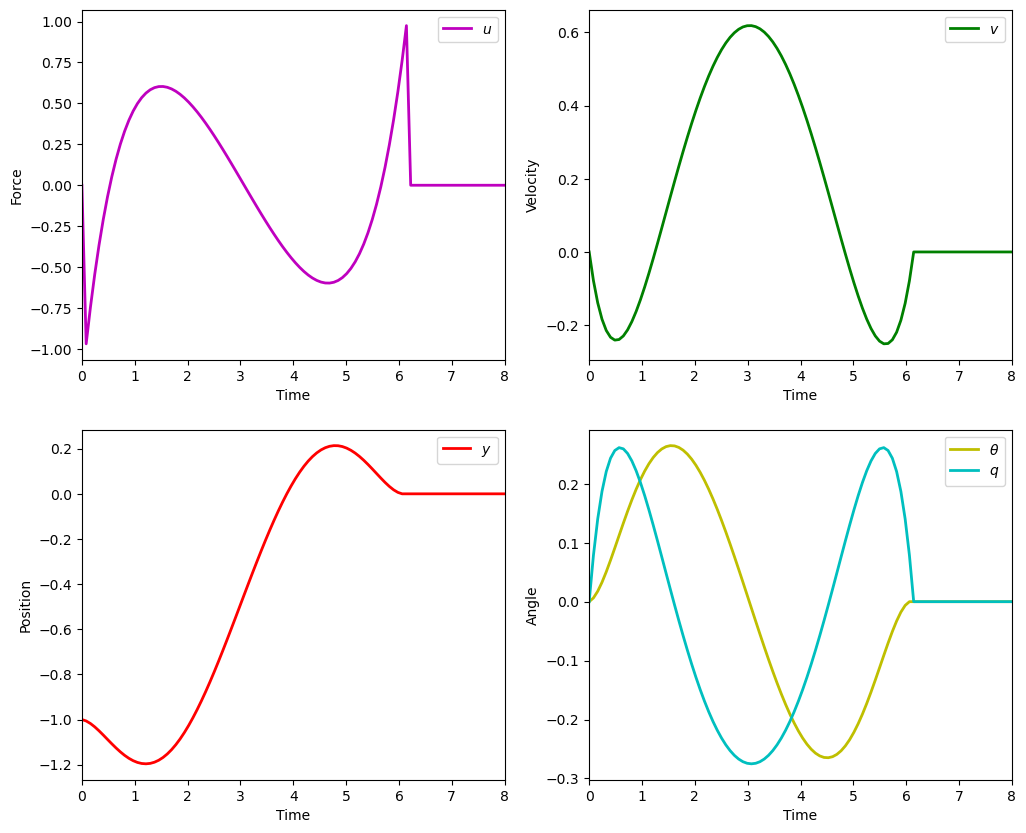

In [29]:
#Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.plot(m.time,ua.value,'m',lw=2)
plt.legend([r'$u$'],loc=1)
plt.ylabel('Force')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(222)
plt.plot(m.time,va.value,'g',lw=2)
plt.legend([r'$v$'],loc=1)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(223)
plt.plot(m.time,ya.value,'r',lw=2)
plt.legend([r'$y$'],loc=1)
plt.ylabel('Position')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])

plt.subplot(224)
plt.plot(m.time,theta_a.value,'y',lw=2)
plt.plot(m.time,qa.value,'c',lw=2)
plt.legend([r'$\theta$',r'$q$'],loc=1)
plt.ylabel('Angle')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.show()

Here
